In [1]:
print("Hello World!")

Hello World!


In [6]:
%pip install matplotlib

     |████████████████████████████████| 13.2MB 1.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 71kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.8MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install scipy

     |████████████████████████████████| 28.8MB 143kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


[[0. 0.]
 [0. 0.]
 [0. 0.]]

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


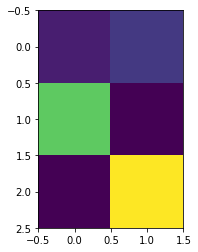

In [10]:
import numpy
import matplotlib as plt

a = numpy.zeros((3,2))
print(a, end="\n\n")

a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

plt.pyplot.imshow(a, interpolation="nearest")

In [19]:
import numpy
import scipy.special

class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # link weigh matrices, wih and who
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
    def train():
        pass
    
    def query():
        pass

In [12]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.5

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [13]:
import numpy

numpy.random.rand(3, 3)

array([[0.003066  , 0.61092867, 0.29625198],
       [0.02315253, 0.73480232, 0.62839136],
       [0.22843016, 0.15547578, 0.1667372 ]])